# Analisis del corpus de datos del algoritmo: 
## El Quijote

En el análisis de Don Quijote emplearemos dos bibliotecas clave de Python: pandas y matplotlib.

Pandas es una herramienta que permite la manipulación y análisis de datos. Podríamos definirlos como un Excel sin interfaz gráfica. Es extremadamente util para manejar datos estructurados como los que vamos a obtener de nuestro texto.

Por su parte, matplotlib es una biblioteca que nos permite crear visualizaciones en 2D. Utilizamos esta biblioteca para graficar la distribución de los caracteres, proporcionando una representación visual de nuestros análisis.

In [4]:
# Primero se importan las librerías necesarias para el análisis
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path


In [5]:
# Función para configurar la visualización de los gráficos
def setup_plots():
    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams["figure.dpi"] = 300
    plt.rcParams["savefig.dpi"] = 300
    plt.rcParams["savefig.bbox"] = 'tight'
    plt.rcParams["savefig.pad_inches"] = 0.1
    plt.rcParams["savefig.transparent"] = True
    plt.rcParams["savefig.format"] = 'png'
    plt.rcParams["savefig.facecolor"] = 'white'
    plt.rcParams["savefig.edgecolor"] = 'white'
    plt.rcParams["savefig.orientation"] = 'landscape'


In [6]:

# Función para generar una lista de caracteres únicos
def get_unique_chars(text, step, chars=None):
    # si no se especifica el número de caracteres, se toma el total
    if not chars:
        chars = len(text)
    charset_list = []
    for i in range(0, chars, step):
        charset_list.append(len(set(text[:i])))
    return charset_list


In [7]:

# Función para crear un DataFrame de los caracteres únicos
def create_df(charset_list, total_chars):
    df = pd.DataFrame(
        {
            'Posición': range(0, len(charset_list)),
            'Caracteres únicos': charset_list,
            'Porcentaje de caracteres únicos': [(x/total_chars)*100 for x in charset_list]
        }
    )
    df.drop_duplicates(subset=['Caracteres únicos'], inplace=True, keep='first')
    return df.style.format({'Porcentaje de caracteres únicos': '{:,.2f}%'.format}).hide_index()


In [8]:

# Función para graficar los caracteres únicos
def plot_unique_chars(charset_list, title, xlabel, ylabel, xticks=None, yticks=range(0, 100, 5), log_scale=False):
    setup_plots()
    plt.grid()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xticks:
        plt.xticks(xticks)
    plt.yticks(yticks)
    plt.plot(charset_list)
    if log_scale:
        plt.yscale('log')
    plt.show()

# Función para imprimir caracteres únicos
def print_unique_chars(text):
    unique_chars = "".join(sorted(set(text)))
    print(unique_chars, len(unique_chars))

# Función para obtener y ordenar el conteo de caracteres
def get_sorted_char_count(text):
    char_count = Counter(text)
    return sorted(char_count.items(), key=lambda x: x[1], reverse=True)

# Función para graficar la distribución de caracteres
def plot_char_distribution(sorted_char_count, log_scale=False):
    total_chars = len(sorted_char_count)
    plt.bar(range(total_chars), [x[1] for x in sorted_char_count], align='center')
    plt.xticks(range(total_chars), [x[0] for x in sorted_char_count])
    if log_scale:
        plt.yscale('log')
    # aseguramos que se muestren todos los caracteres en el eje x
    length = len(sorted_char_count)
    plt.xlim( -1, length)
    plt.show()

# Función para imprimir caracteres en orden de frecuencia
def print_chars_by_frequency(sorted_char_count):
    print("".join([x[0] for x in sorted_char_count]))



In [9]:
# Configuración
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cargar datos
recursos = Path.cwd() / "recursos"
quijote_file = recursos / 'pg2000.txt'

with open(quijote_file, 'r', encoding='utf-8-sig') as file:
    quijote_data = ''.join(file.readlines()[36:-372])


In [10]:

# Características básicas del texto
unique_chars = len(set(quijote_data))
text_length = len(quijote_data)

print("Número de caracteres únicos: ", unique_chars)
print("Longitud en caracteres del texto: ", text_length)


Número de caracteres únicos:  91
Longitud en caracteres del texto:  2097953


In [9]:
# Listamos los caracteres únicos en orden de aparición en el texto
print("".join(list( dict.fromkeys(quijote_data))))


El ingeoshdaQujtMc
TASY,JGrbCámRyñqfvpéí;.VIONDLóU1604FPúz:BÉxÓ¿?-¡!XZü»H'ÁÍÑ«()"ïÚW]à7523ù


In [10]:

# Contar caracteres únicos de los primeros 3000 caracteres
charset_list_1 = get_unique_chars(quijote_data,  1, 3000)


In [11]:
# Creamos una tabla con los caracteres únicos y donde aparecen por primera vez en el texto
df = create_df(charset_list_1, unique_chars)
df


Posición,Caracteres únicos,Porcentaje de caracteres únicos
0,0,0.00%
1,1,1.10%
2,2,2.20%
3,3,3.30%
4,4,4.40%
5,5,5.49%
6,6,6.59%
7,7,7.69%
10,8,8.79%
11,9,9.89%


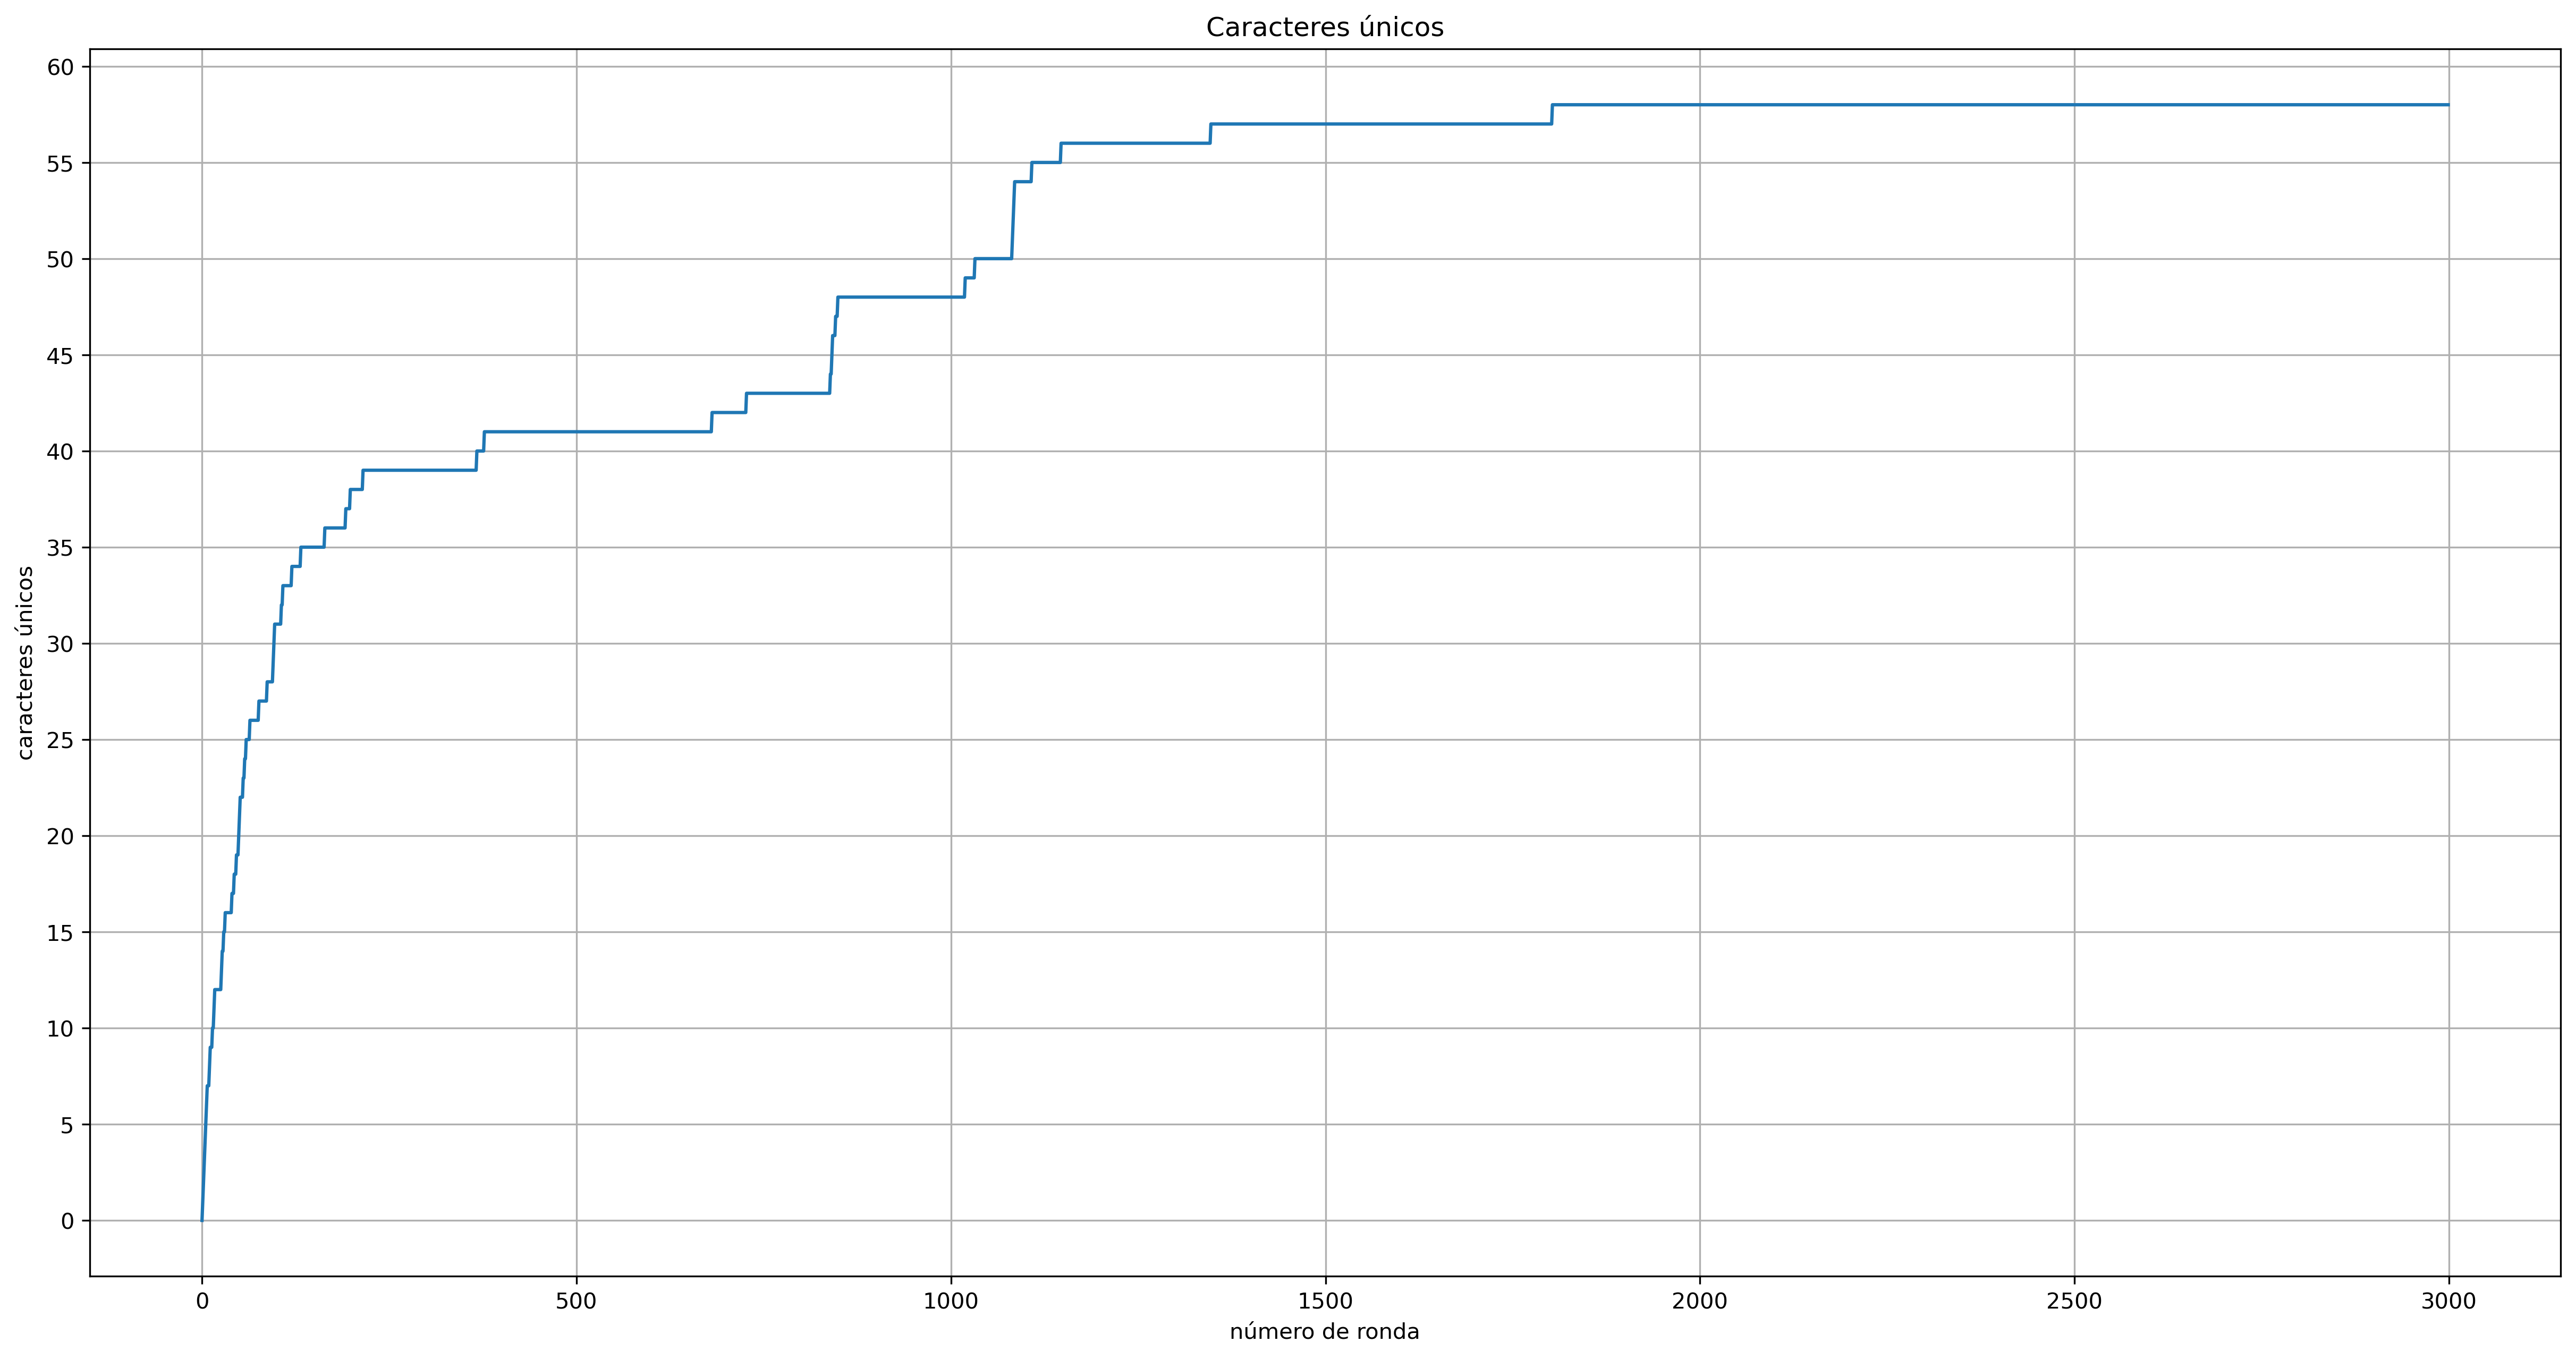

In [12]:

# Graficar caracteres únicos
plot_unique_chars(charset_list_1, 'Caracteres únicos', 'número de ronda', 'caracteres únicos')


In [13]:

# Repetir el proceso para cada 1000 caracteres
charset_list_1000 = get_unique_chars(quijote_data, 1000)
df = create_df(charset_list_1000, unique_chars)
df


Posición,Caracteres únicos,Porcentaje de caracteres únicos
0,0,0.00%
1,48,52.75%
2,58,63.74%
5,62,68.13%
6,64,70.33%
7,65,71.43%
9,68,74.73%
10,70,76.92%
13,73,80.22%
21,75,82.42%


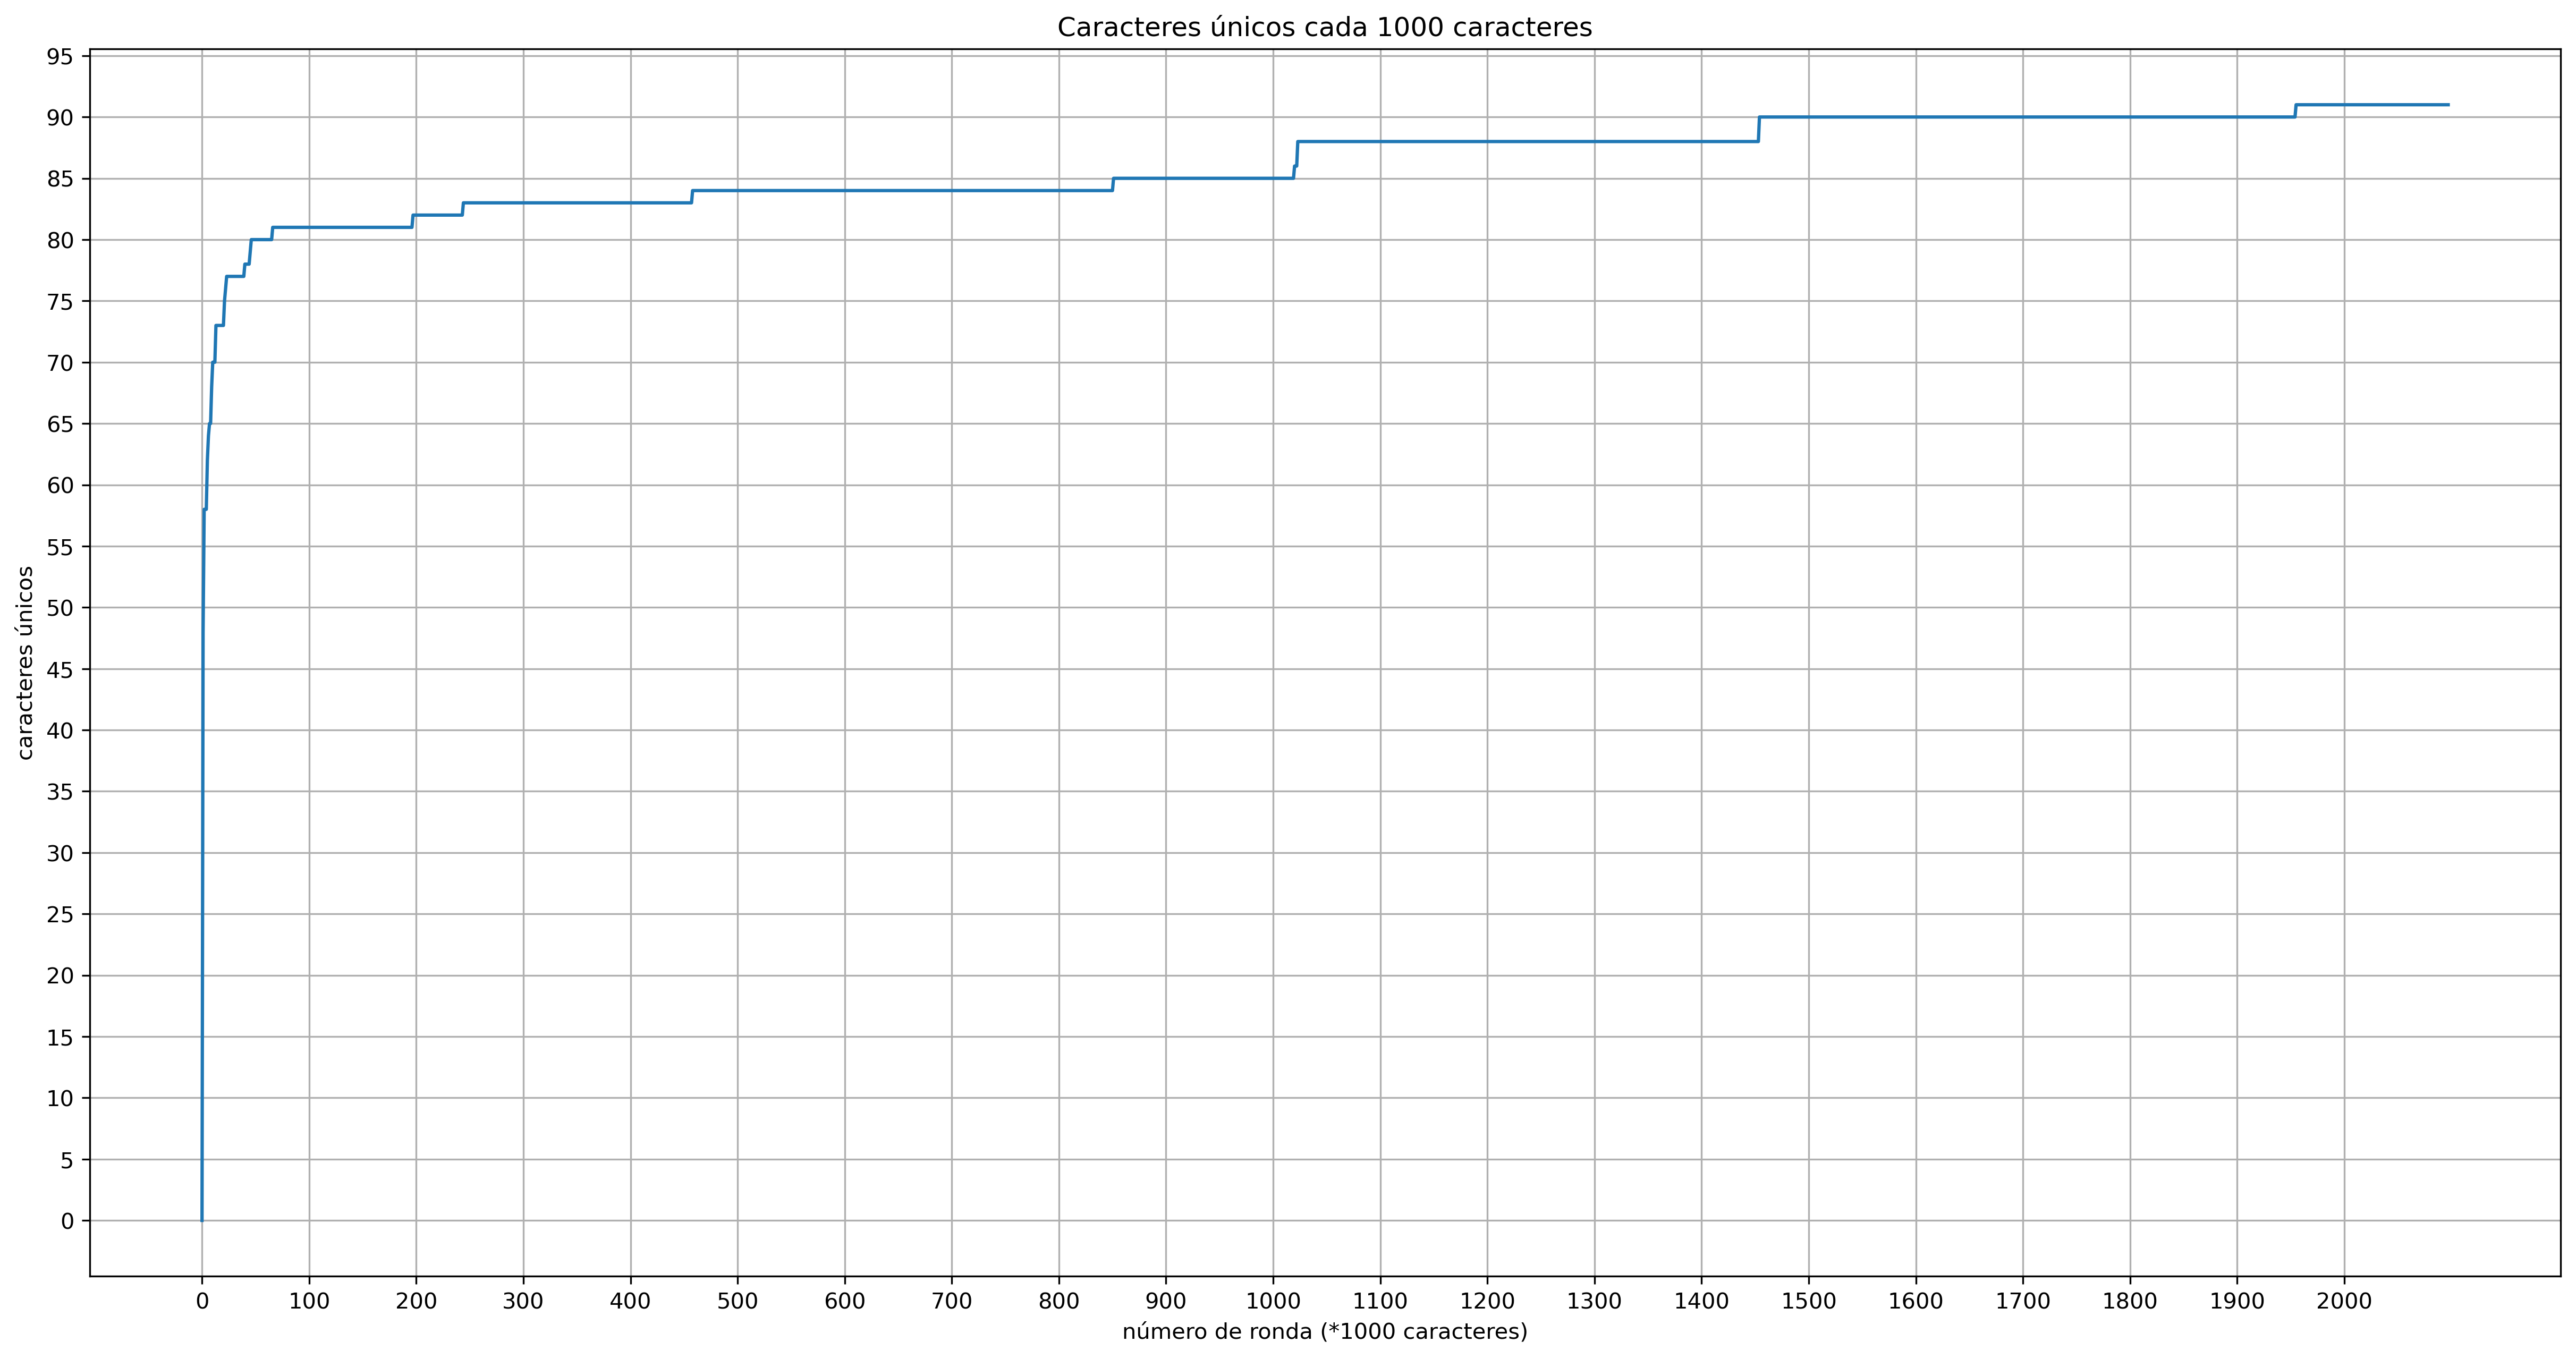

In [14]:

plot_unique_chars(charset_list_1000, 'Caracteres únicos cada 1000 caracteres', 'número de ronda (*1000 caracteres)', 'caracteres únicos', xticks=range(0, 2100, 100))


In [15]:

# Imprimir caracteres únicos
print_unique_chars(quijote_data)



 !"'(),-.01234567:;?ABCDEFGHIJLMNOPQRSTUVWXYZ]abcdefghijlmnopqrstuvxyz¡«»¿ÁÉÍÑÓÚàáéíïñóùúü 91


In [16]:

# Analizar la distribución de los caracteres en el texto
sorted_char_count = get_sorted_char_count(quijote_data)


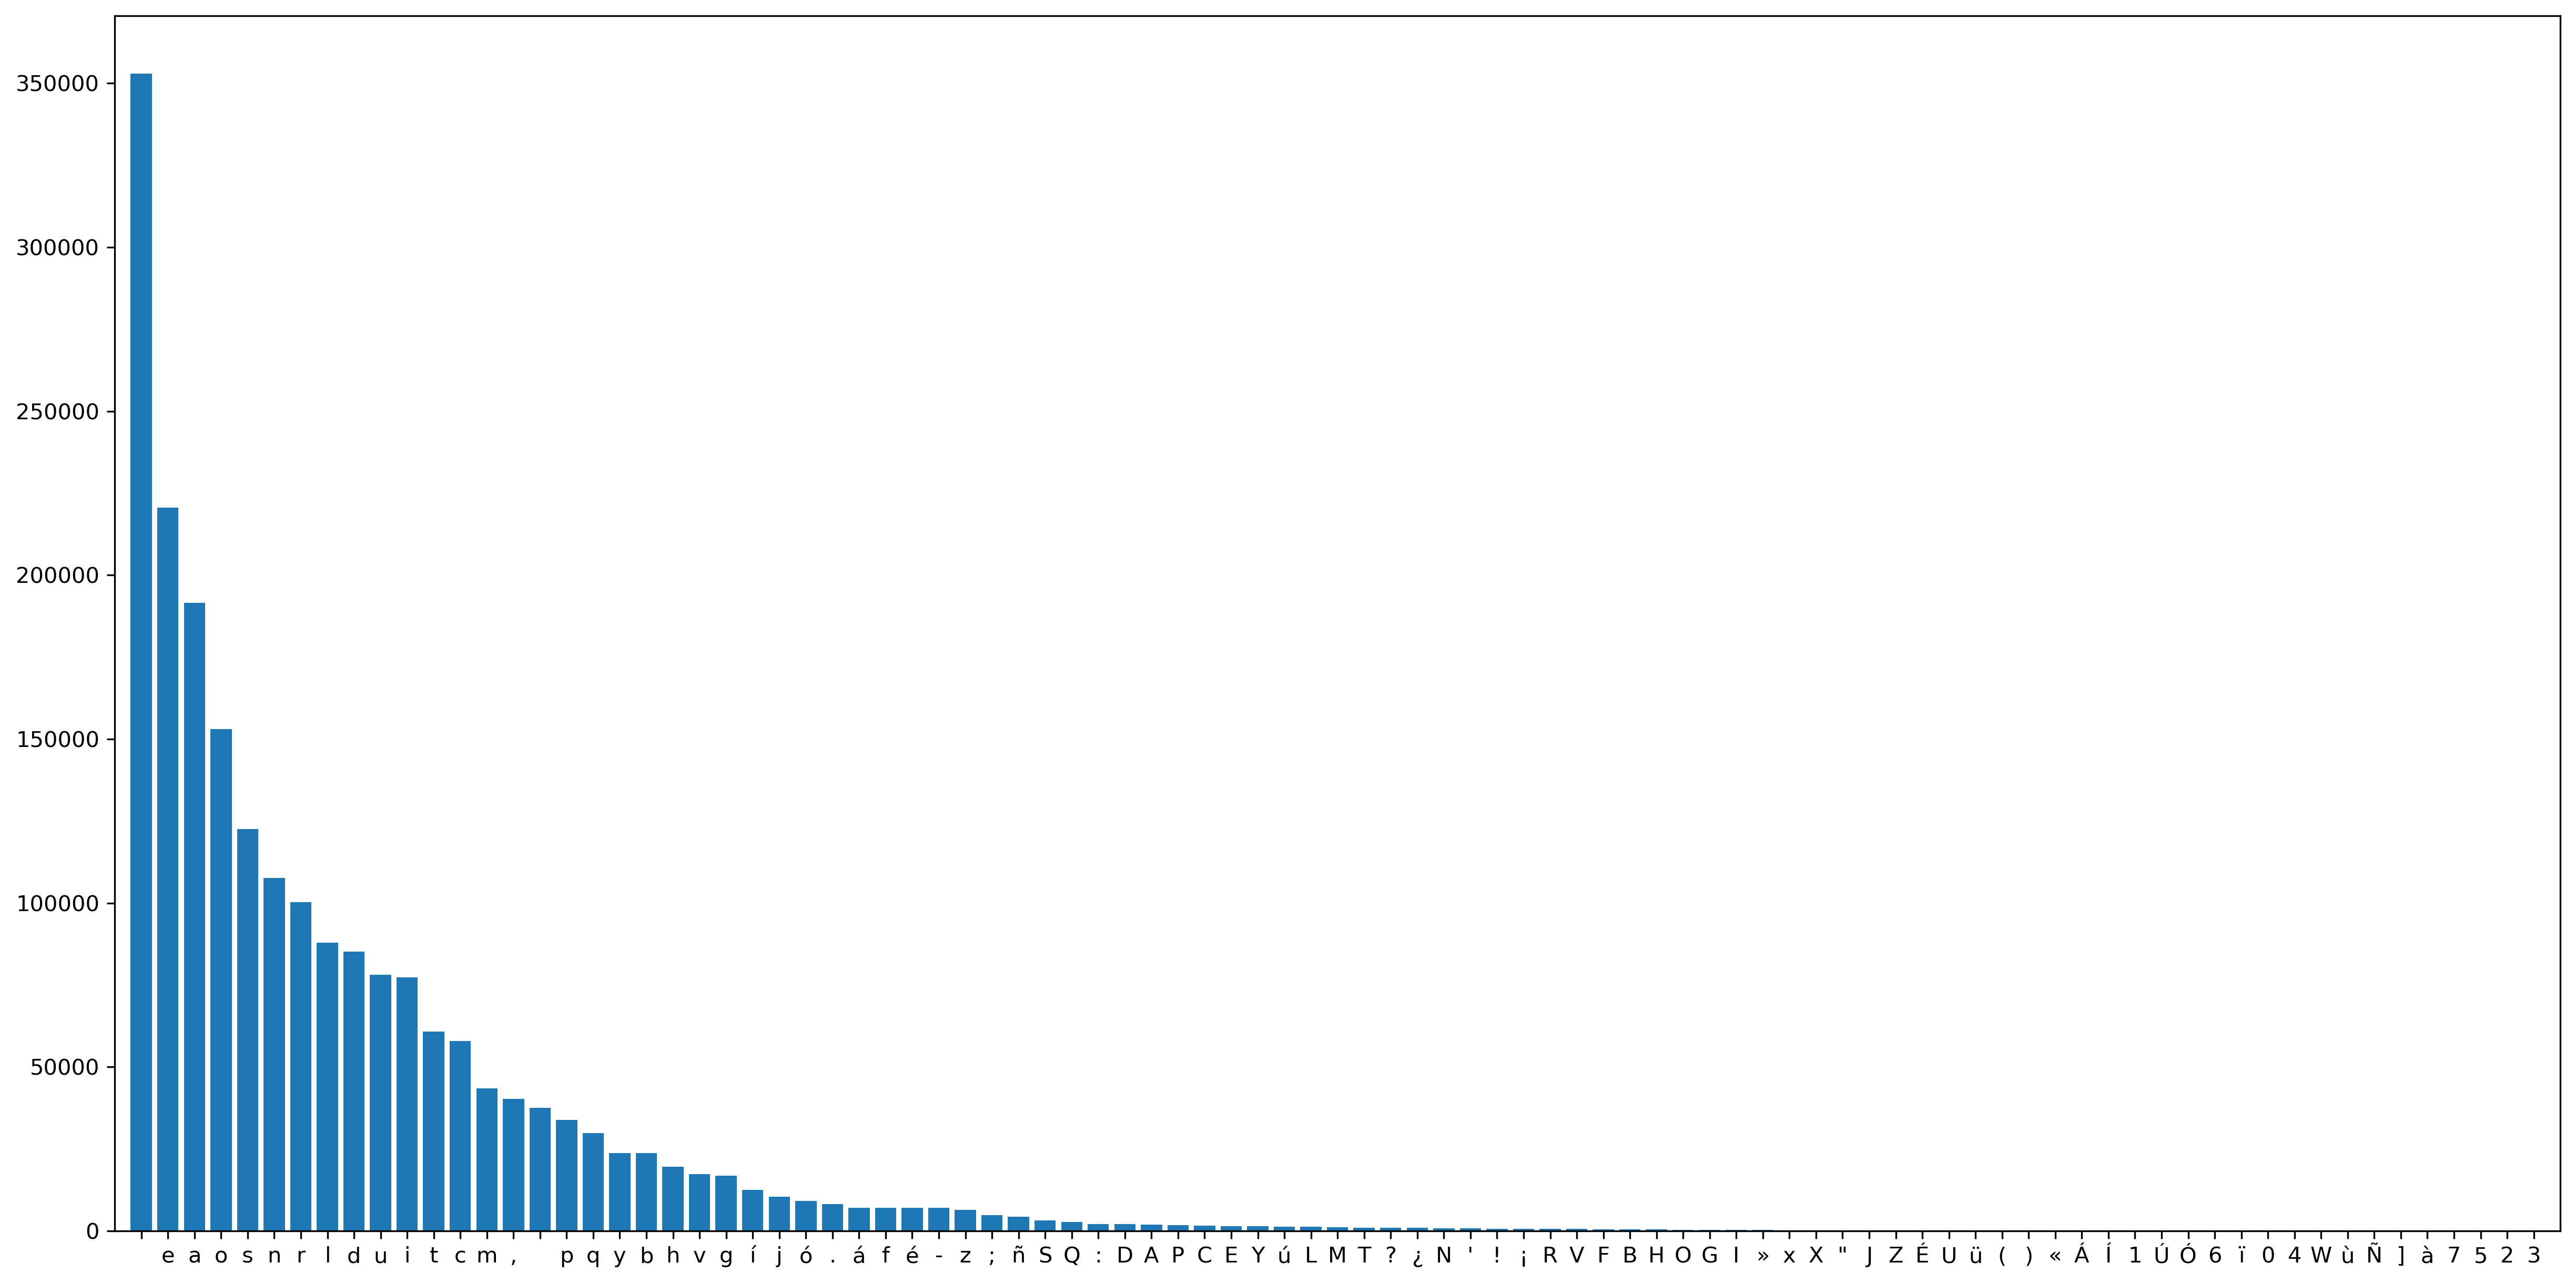

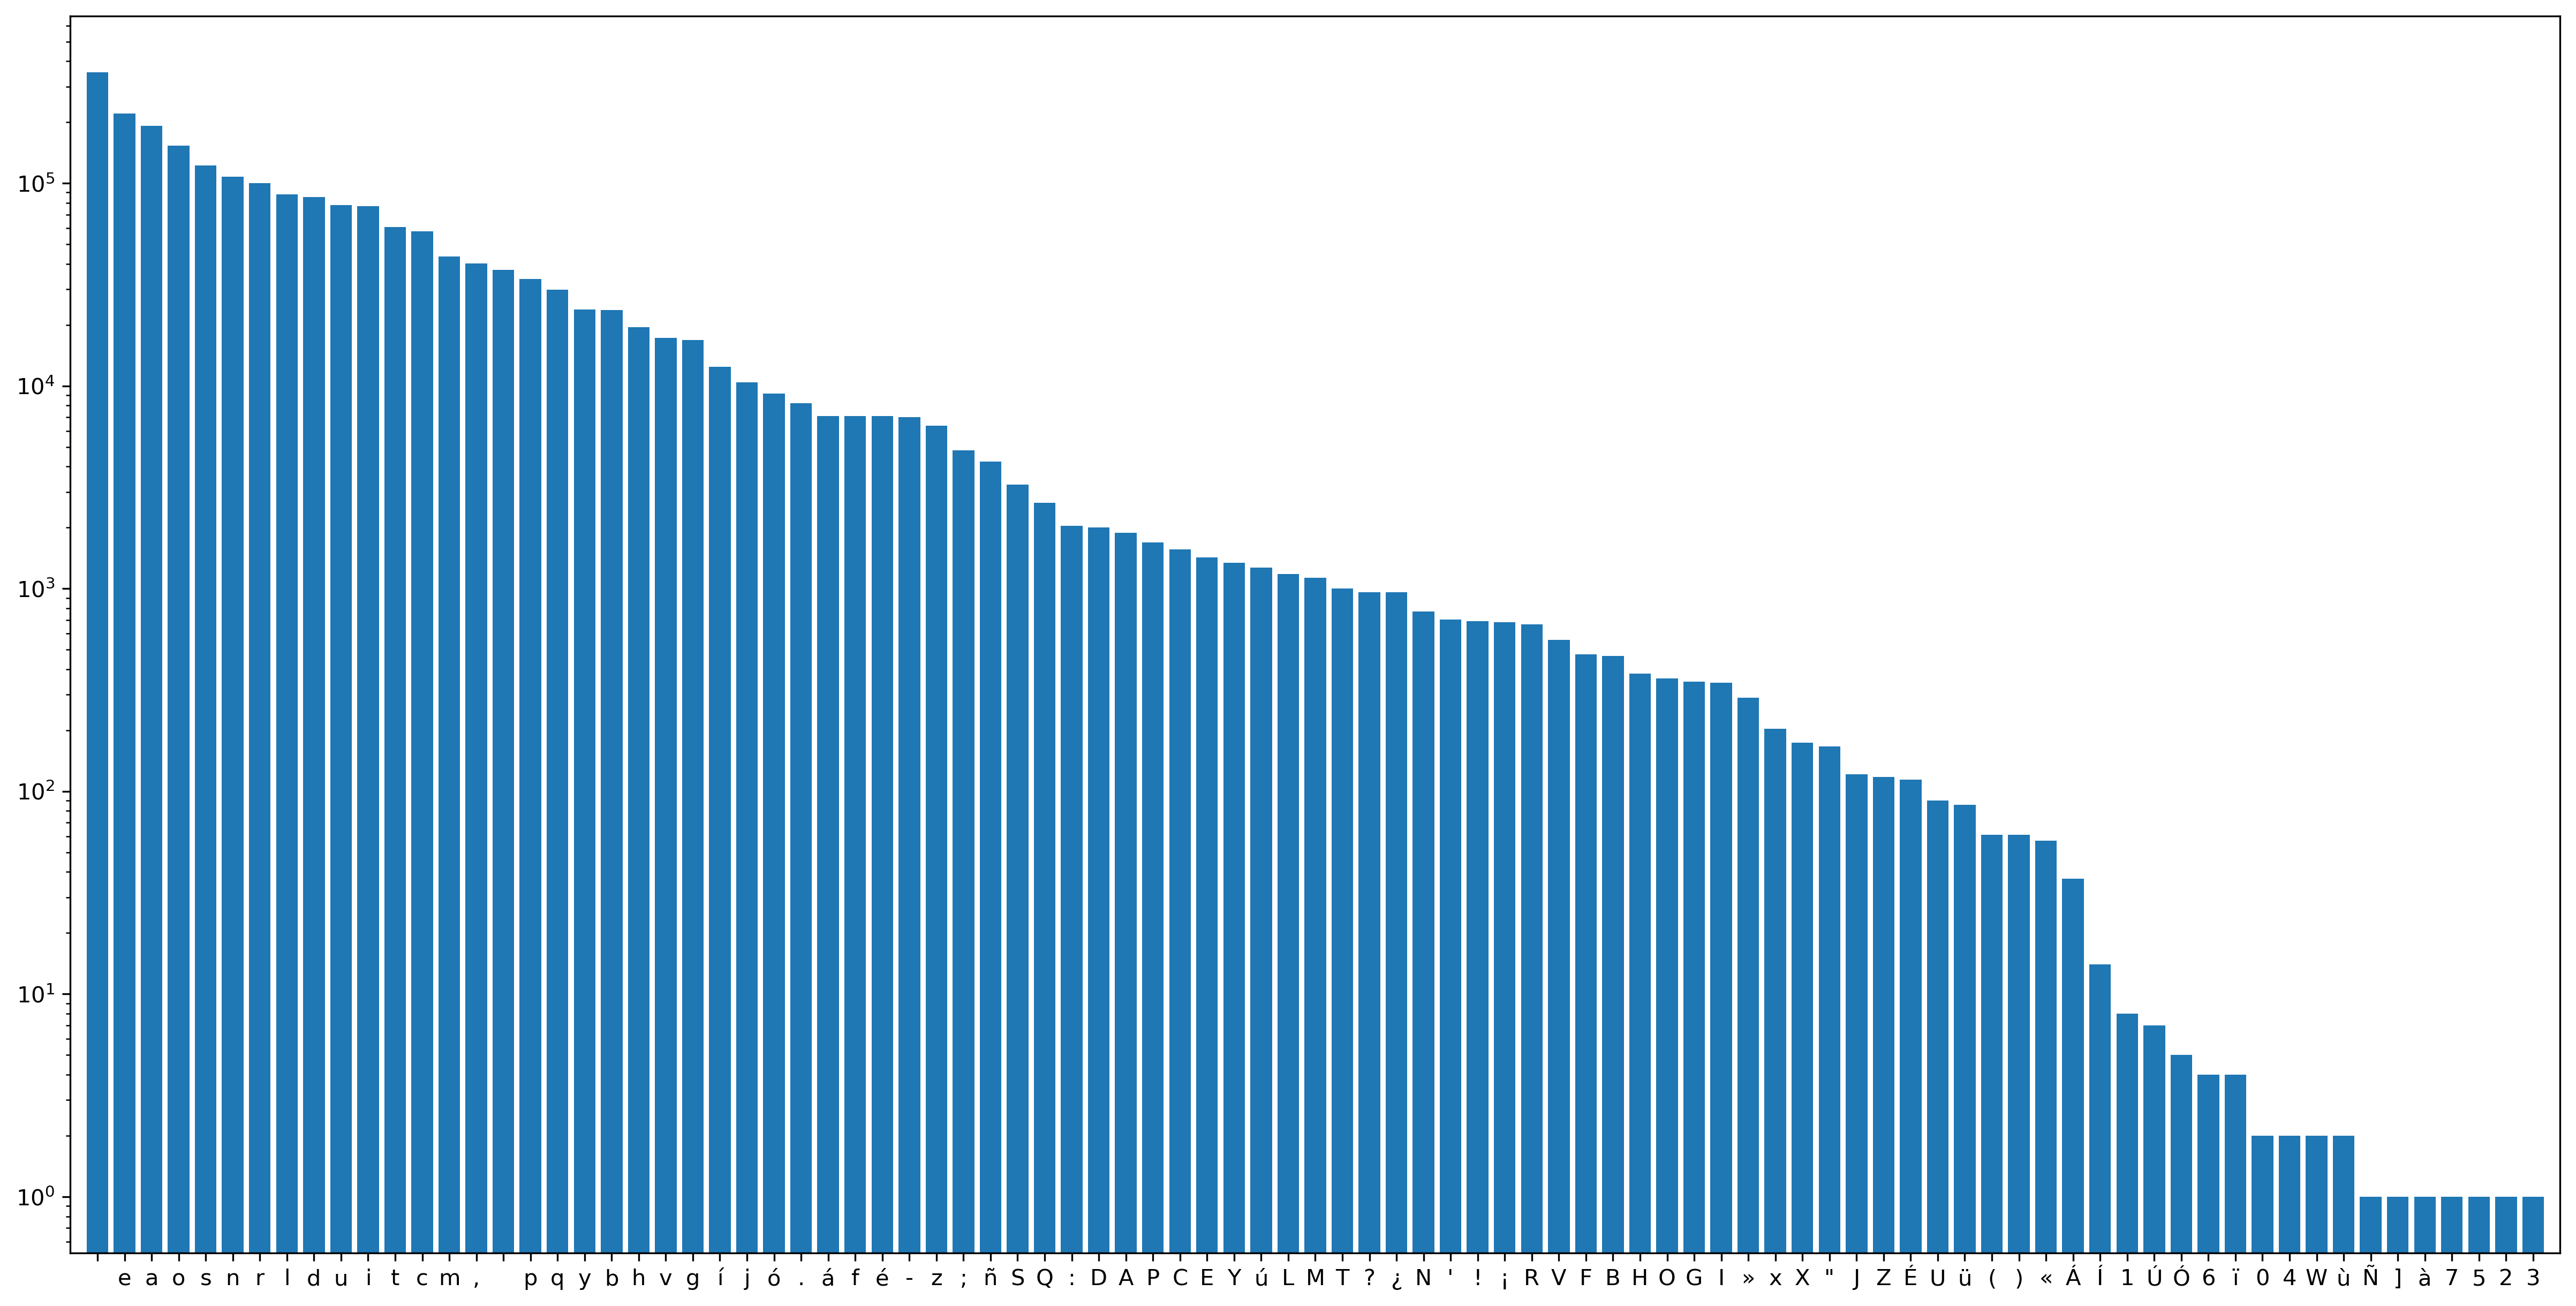

In [30]:

# Mostrar la distribución de los caracteres en el texto
plot_char_distribution(sorted_char_count)
# Ahora con escala logarítmica
plot_char_distribution(sorted_char_count, log_scale=True)


In [18]:

# Imprimir los caracteres en orden de frecuencia
print_chars_by_frequency(sorted_char_count)

 eaosnrlduitcm,
pqybhvgíjó.áfé-z;ñSQ:DAPCEYúLMT?¿N'!¡RVFBHOGI»xX"JZÉUü()«ÁÍ1ÚÓ6ï04WùÑ]à7523
